#Data Exploration

In [0]:
# Download the dataset here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
#from google.colab import files

#upload = files.upload()

In [0]:
# Read the data into the notebook
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', index_col='Id')

In [13]:
# Print length of dataset and number of columns
train.shape

(1460, 80)

In [14]:
# Look through the features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
# Sample data 
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [0]:
# Display histograms of all the different features
plots = train.hist(bins=20,figsize = (20,30))

In [0]:
# Describe the dataframe (Min, max, mean, null, etc)
desc = train.describe(include = 'all')

desc.loc['dtype'] = train.dtypes
desc.loc['size'] = len(train)
desc.loc['% null'] = train.isnull().mean() * 100

desc

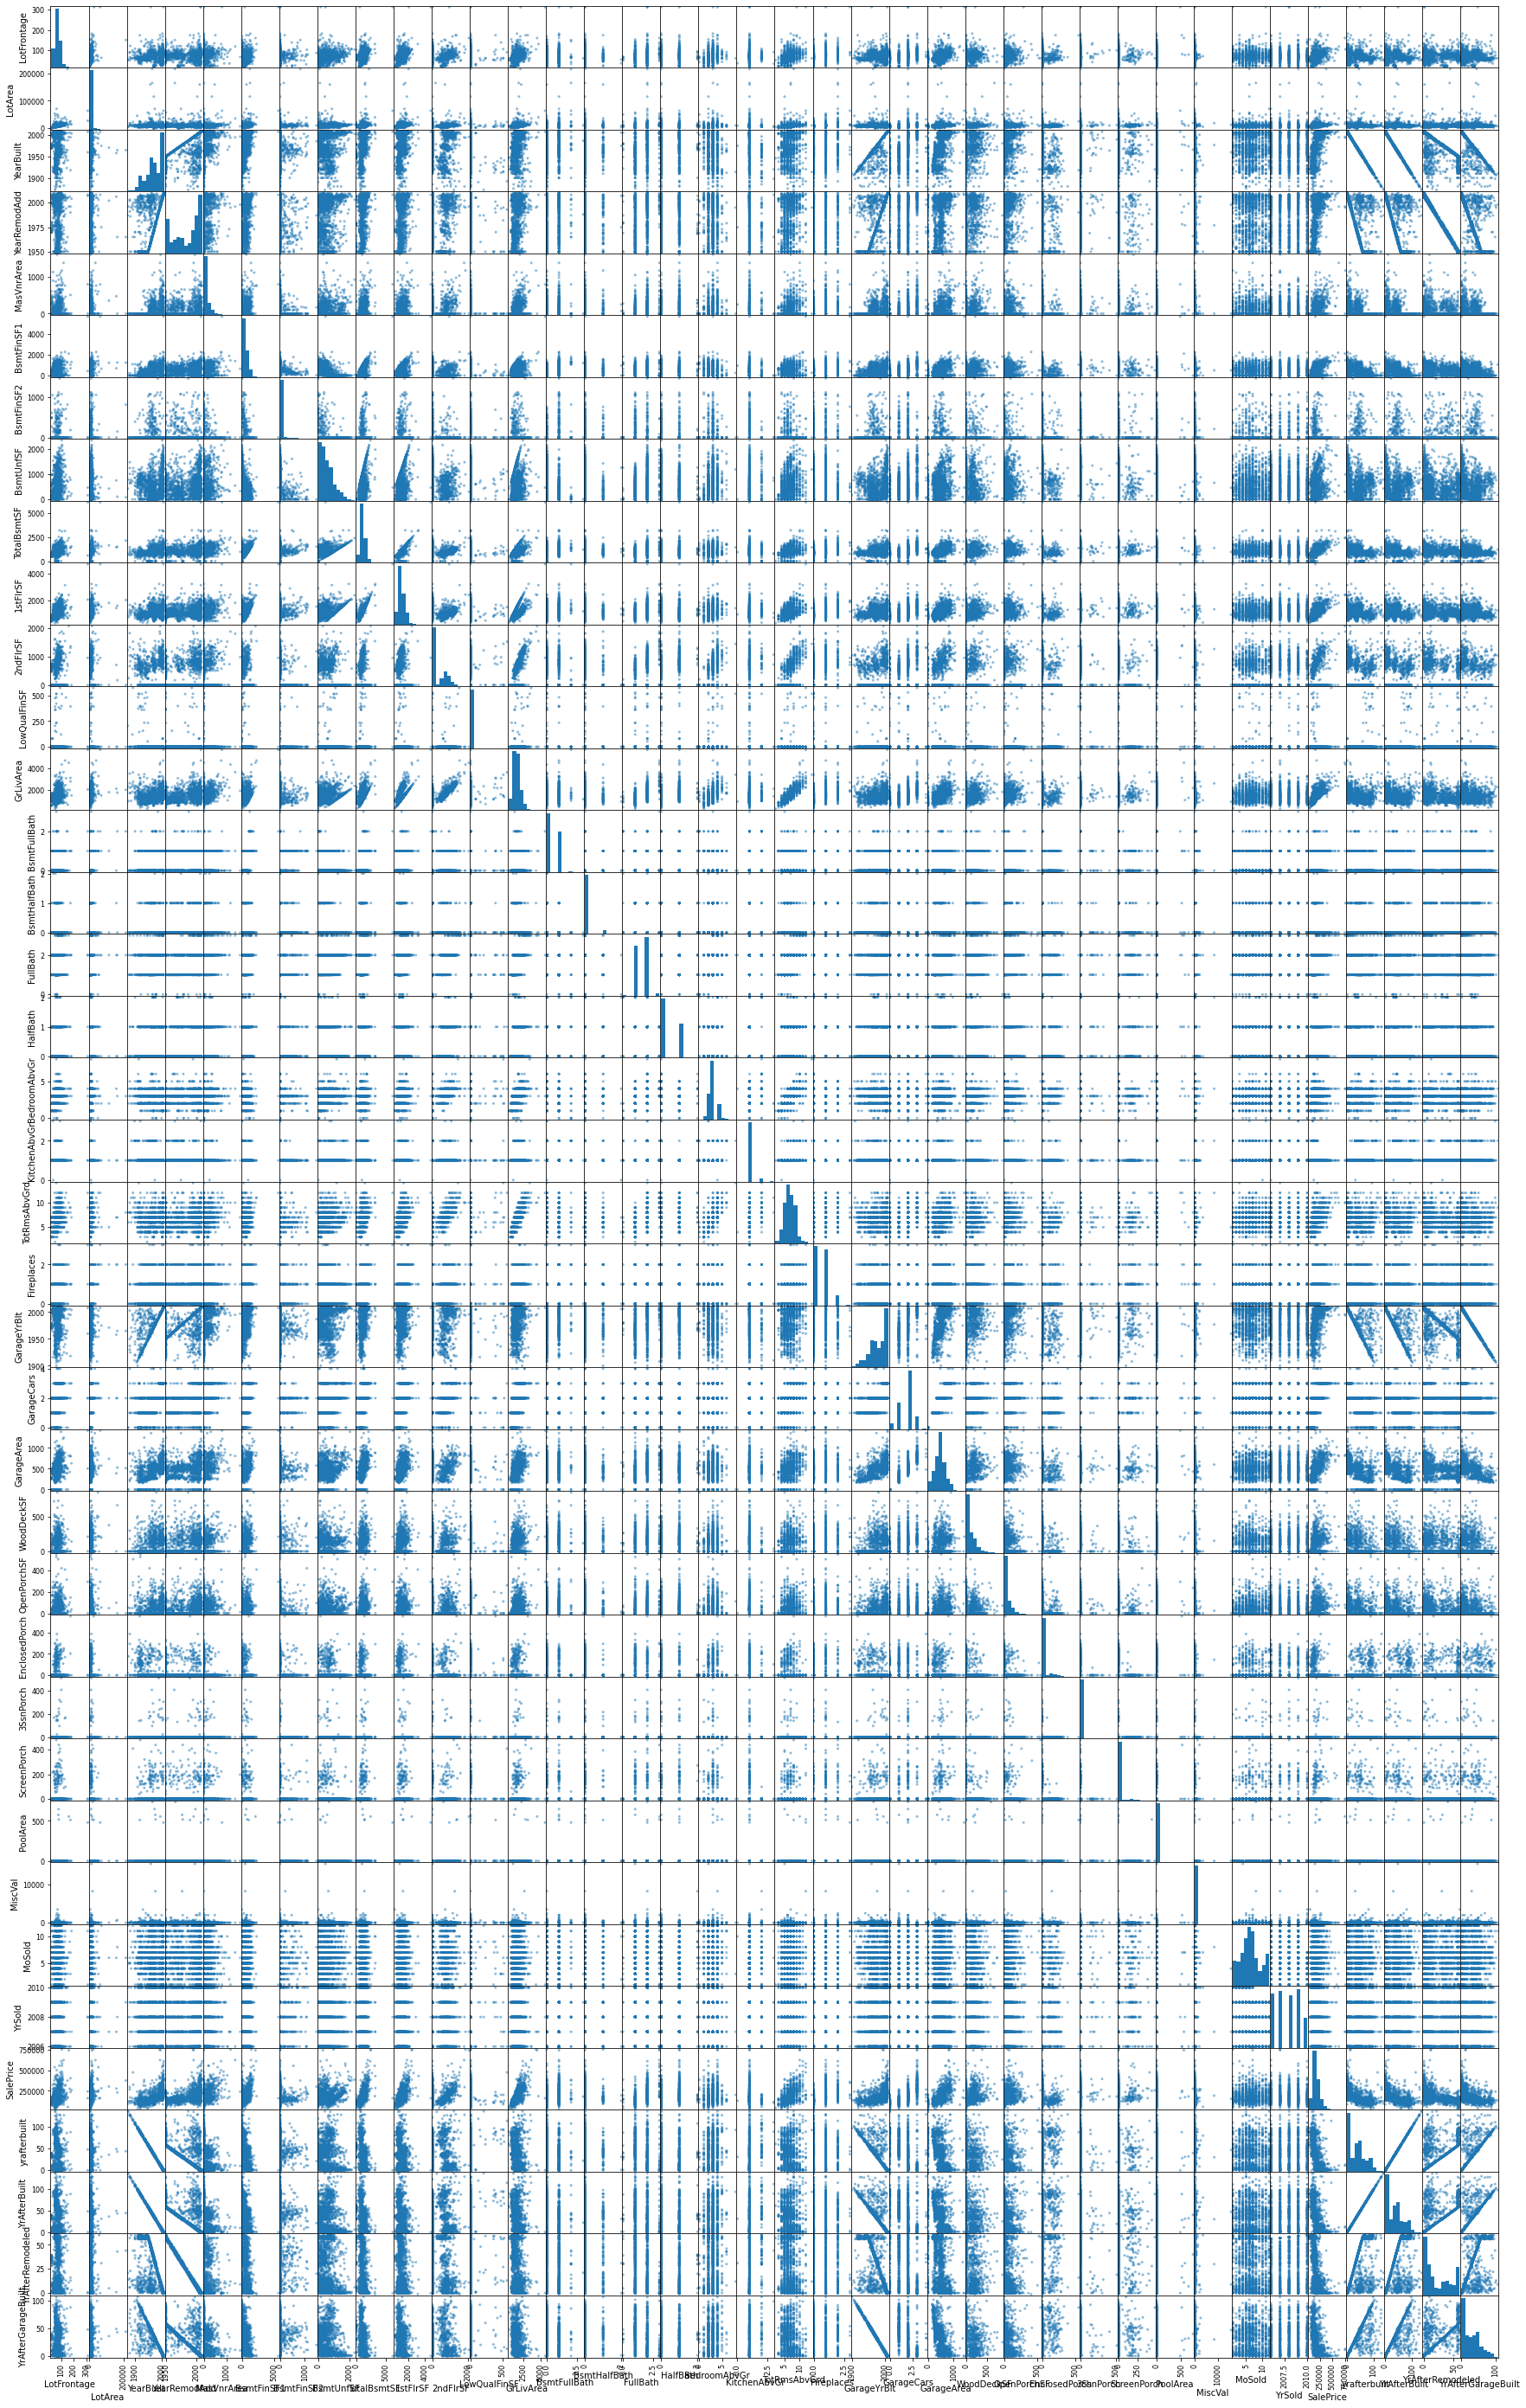

In [52]:
# Too hard to read but worth a look - scatter matrix for all features
plots = pd.plotting.scatter_matrix(train, figsize=(30,50))

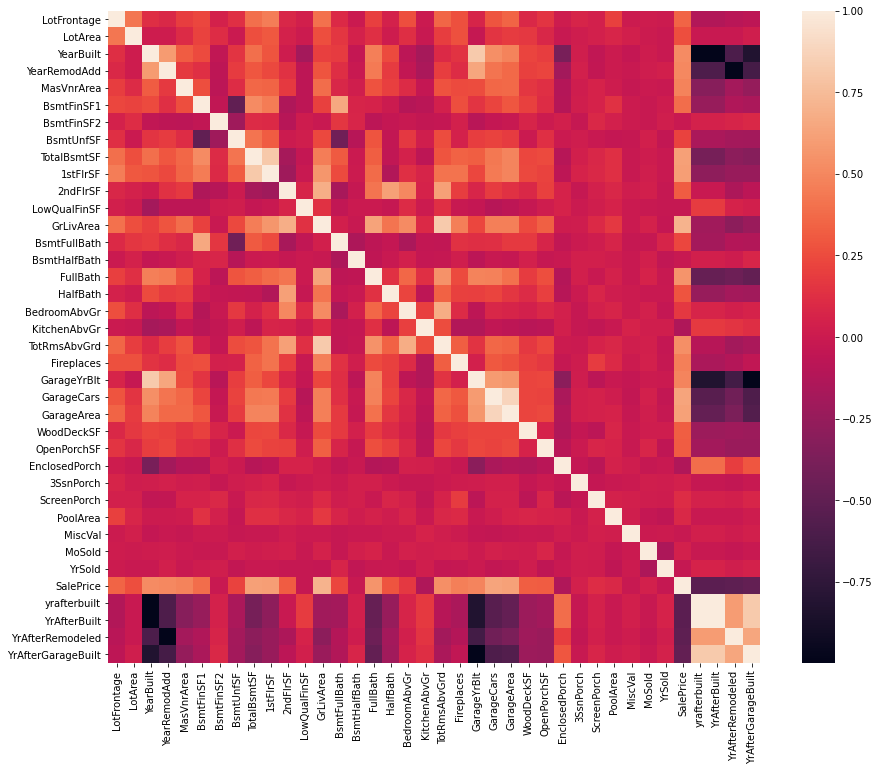

In [81]:
# View a heat map of the correlation between features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train.corr(), square=True);

In [20]:
# Display the features with the highest correlation to sale price
train.corr().nlargest(15, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

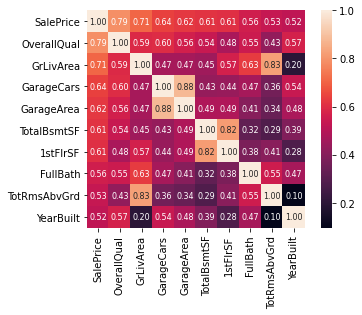

In [23]:
# Print a heatmap of the 10 most correlated (to sale price) variables
n = 10
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

#Variable Cleaning

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
#check missing vlaues
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
#categorical variables
cat_var=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
len(cat_var)

46

In [37]:
#date (year) variables
dat_var=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
len(dat_var)

4

In [38]:
#numerical variables
num_var=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
len(num_var)

29

In [39]:
#define data type of categorical variables
for i in cat_var:
  train[i]=train[i].astype('category') 
 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [70]:
#calculate the number of years after built/remodeled/garage built  == new numerical variables

train['YrAfterBuilt']=train['YrSold']-train['YearBuilt']
train['YrAfterRemodeled']=train['YrSold']-train['YearRemodAdd']
train['YrAfterGarageBuilt']=train['YrSold']-train['GarageYrBlt']
train[['YrAfterBuilt','YrAfterRemodeled','YrAfterGarageBuilt']].head()

,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


In [0]:
#add them to train

In [0]:
#sort variables by features
var_housetype = ['MSSubClass','LandContour','LotShape','LotConfig','LandSlope','BldgType','HouseStyle']
var_zone=['MSZoning','Neighborhood']
var_access=['Street','Alley','Condition1','Condition2']
var_size=['LotFrontage','LotArea',]
var_util=['Utilities']
var_housecond=['OverallQual','OverallCond','YearBuilt','YearRemodAdd','Foundation','Electrical','Functional','MiscVal','MiscFeature','YrAfterBuilt','YrAfterRemodeled']
var_ext=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']
var_base=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF']
var_heat=['Heating','HeatingQC','CentralAir','Fireplaces','FireplaceQu']
var_int=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
var_garage=['YrAfterGarageBuilt','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence']
var_sales=['MoSold','YrSold','SaleType','SaleCondition']

In [63]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_housetype].corr()

""


In [55]:
#calculate correlation between variables in the same group
#there is no numerical variable 
train[var_zone].corr()

""


In [64]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_access].corr()

""


In [65]:
#calculate correlation between variables in the same group
train[var_size].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [66]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_util].corr()

""


In [72]:
#calculate correlation between variables in the same group
train[var_housecond].corr()

,YearBuilt,YearRemodAdd,MiscVal,YrAfterBuilt,YrAfterRemodeled
YearBuilt,1.000000,0.592855,-0.034383,-0.999036,-0.593868
YearRemodAdd,0.592855,1.000000,-0.010286,-0.590360,-0.997930
MiscVal,-0.034383,-0.010286,1.000000,0.034545,0.010604
YrAfterBuilt,-0.999036,-0.590360,0.034545,1.000000,0.594195
YrAfterRemodeled,-0.593868,-0.997930,0.010604,0.594195,1.000000


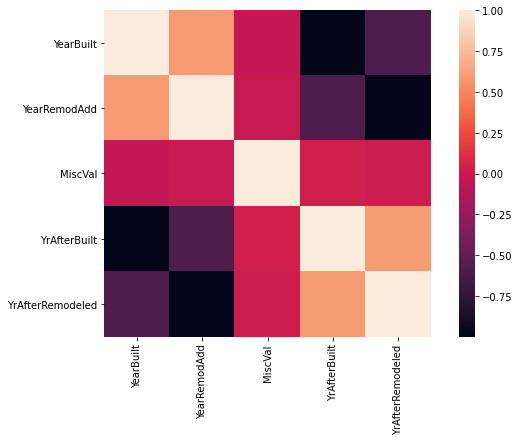

In [83]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train[var_housecond].corr(), square=True);

In [73]:
#calculate correlation between variables in the same group
#there is one numerical varible in the group
train[var_ext].corr()

,MasVnrArea
MasVnrArea,1.0


In [74]:
#calculate correlation between variables in the same group
train[var_base].corr()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
BsmtFinSF1,1.000000,-0.050117,0.522396
BsmtFinSF2,-0.050117,1.000000,0.104810
TotalBsmtSF,0.522396,0.104810,1.000000


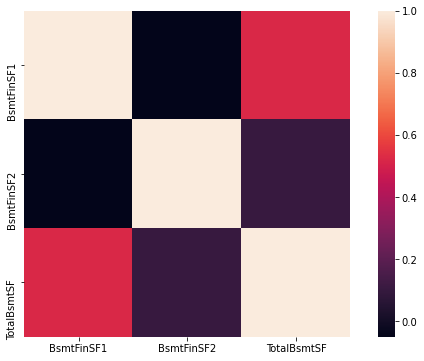

In [84]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train[var_base].corr(), square=True);

In [75]:
#calculate correlation between variables in the same group
#there is one numerical variable in the group
train[var_heat].corr()

,Fireplaces
Fireplaces,1.0


In [78]:
#calculate correlation between variables in the same group
train[var_int].corr()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
1stFlrSF,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516
2ndFlrSF,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423
LowQualFinSF,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185
GrLivArea,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489
BsmtFullBath,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275
BsmtHalfBath,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836
FullBath,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784
HalfBath,-0.119916,0.609707,-0.027080,0.415772,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415
BedroomAbvGr,0.127401,0.502901,0.105607,0.521270,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620
KitchenAbvGr,0.068101,0.059306,0.007522,0.100063,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045


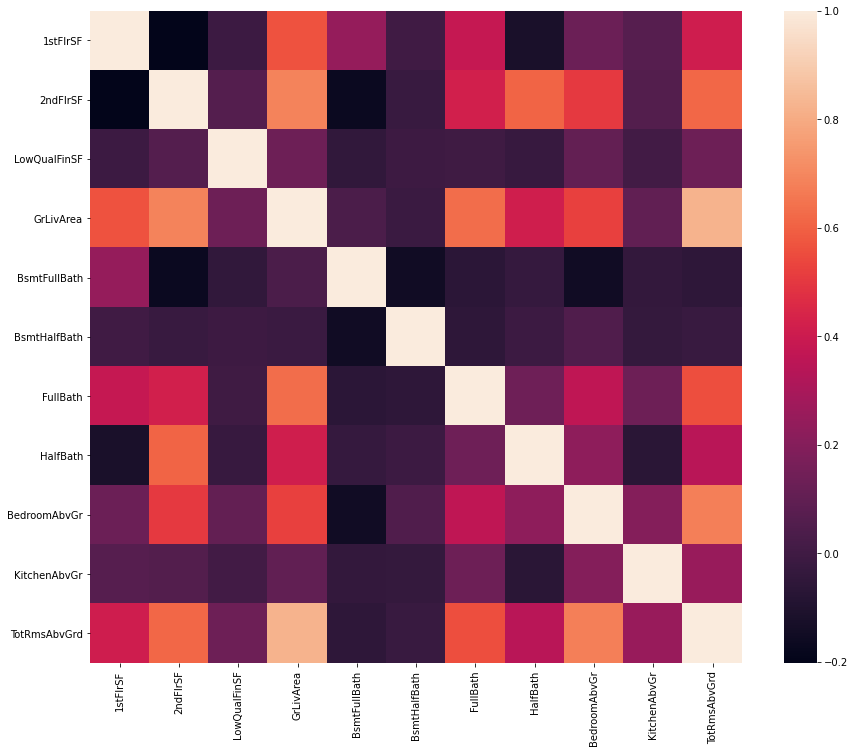

In [85]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train[var_int].corr(), square=True);

In [79]:
#calculate correlation between variables in the same group
train[var_garage].corr()

,YrAfterGarageBuilt,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
YrAfterGarageBuilt,1.000000,-0.998552,-0.590244,-0.565122,-0.223246,-0.231847,0.296273,-0.022460,0.075937,0.011190
GarageYrBlt,-0.998552,1.000000,0.588920,0.564567,0.224577,0.228425,-0.297003,0.023544,-0.075418,-0.014501
GarageCars,-0.590244,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934
GarageArea,-0.565122,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047
WoodDeckSF,-0.223246,0.224577,0.226342,0.224666,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378
OpenPorchSF,-0.231847,0.228425,0.213569,0.241435,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762
EnclosedPorch,0.296273,-0.297003,-0.151434,-0.121777,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203
3SsnPorch,-0.022460,0.023544,0.035765,0.035087,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992
ScreenPorch,0.075937,-0.075418,0.050494,0.051412,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307
PoolArea,0.011190,-0.014501,0.020934,0.061047,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000


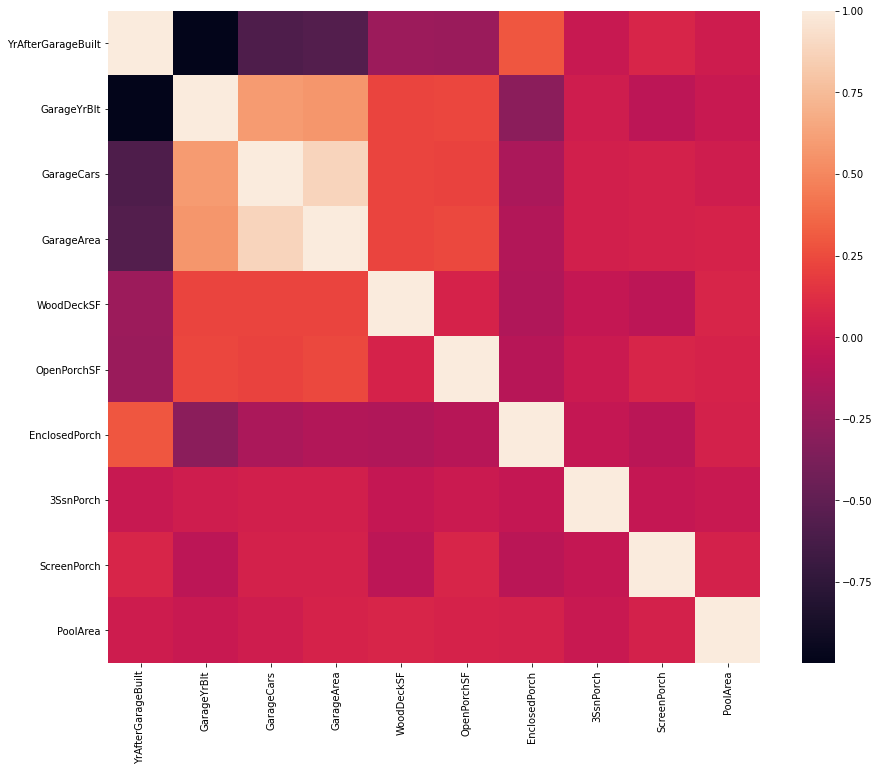

In [86]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train[var_garage].corr(), square=True);

In [80]:
#calculate correlation between variables in the same group
train[var_sales].corr()

,MoSold,YrSold
MoSold,1.000000,-0.145721
YrSold,-0.145721,1.000000


In [0]:
# Among top 20 variables with the highest correlation to sale price, some of them are highly correlated. 

var_top20=train.corr().nlargest(20, 'SalePrice')['SalePrice'].index

In [101]:
train[var_top20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  MasVnrArea    1452 non-null   float64
 12  Fireplaces    1460 non-null   int64  
 13  BsmtFinSF1    1460 non-null   int64  
 14  LotFrontage   1201 non-null   float64
 15  WoodDeckSF    1460 non-null   int64  
 16  2ndFlrSF      1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  HalfBath      1460 non-null 

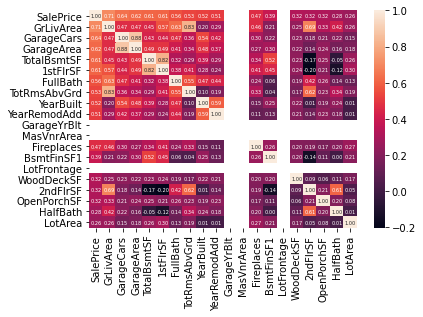

In [98]:
n = 20
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

Those are highly correlated to each other (corr >0.8)

*   GrLivArea, TotRmsAbvGrd
*   GarageCars, GarageArea
*   TotalBsmtSF, 1stFlrSF








In [108]:
#remove one of two variables highly correlated. 
train_2=train.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'],axis=1)
train_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,yrafterbuilt,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5,5,5.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31,31,31.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,7,6,7.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,91,36,8.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,...,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8,8,7,8.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,...,SBrkr,0,0,2073,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32,32,22,32.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,...,SBrkr,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69,69,4,69.0


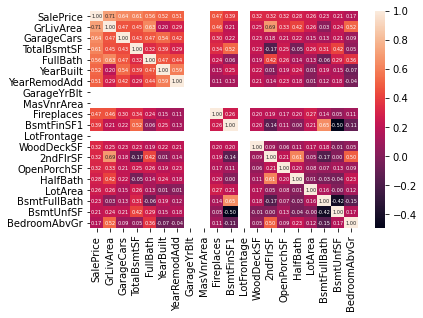

In [109]:
n = 20
cols = train_2.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

In [0]:
#Guessing Null Values. 

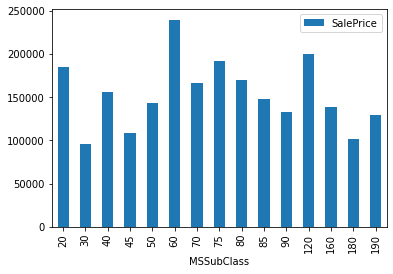

In [111]:
#Use categorical Variable
train[['MSSubClass','SalePrice']].groupby(['MSSubClass']).mean().plot(kind='bar',color='tab:blue')

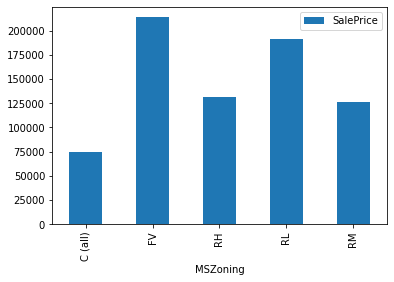

In [112]:
train[['MSZoning','SalePrice']].groupby(['MSZoning']).mean().plot(kind='bar',color='tab:blue')

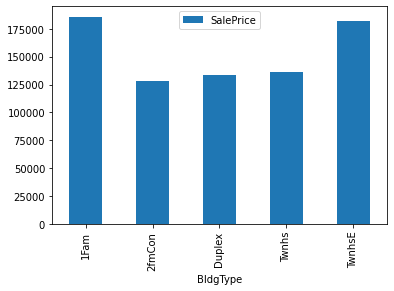

In [113]:
train[['BldgType','SalePrice']].groupby(['BldgType']).mean().plot(kind='bar',color='tab:blue')

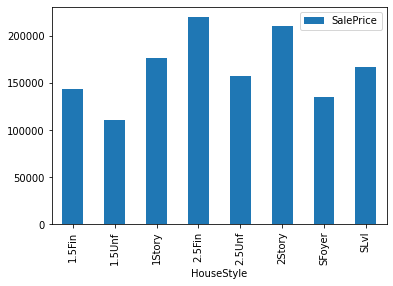

In [114]:
train[['HouseStyle','SalePrice']].groupby(['HouseStyle']).mean().plot(kind='bar',color='tab:blue')